# Code Conquerors 
 

- Members Information:

  - Name: Md Nafesh Anam 

  - Name: Shaheer Farrubar Shamsi 

  - Name: Midhat Ratib Khan 

  - Name: Md Sohanur Rahman    


# Phase 1 Implementation

# Data Preprocessing

- Importing Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

- Reading Dataset

In [8]:
df = pd.read_excel("RTA Data 2020 to July 2023.xlsx")

In [9]:
df

EcYear EcNumber            CallTime  \
0       2020    31486 2020-12-31 22:41:47   
1       2020    31485 2020-12-31 22:25:00   
2       2020    31483 2020-12-31 21:54:59   
3       2020    31482 2020-12-31 21:24:22   
4       2020    31479 2020-12-31 21:03:49   
...      ...      ...                 ...   
46184   2023      NaN                 NaT   
46185   2023   356986 2023-01-01 04:23:00   
46186   2023   356981 2023-01-01 02:16:00   
46187   2023   356980 2023-01-01 02:02:00   
46188   2023   356977 2023-01-01 01:00:00   

                                           EmergencyArea  \
0                          NEAR APS SCHOOL FORT ROAD RWP   
1      Infront of Daig.com, Near Dha gate 2,  gt road...   
2      Muhammadi chowk arshad bakery khyaban e sirsye...   
3      Gulzar e quaid, T/W Katcheri Near Attock Pump,...   
4      Taaj Company Gawalmandi Chowk Liaqat Baag Road...   
...                                                  ...   
46184             Infront Of Mian G hotel GT Road Mandra   
46185  Barma Shell Depu Dhoke Munshi Road, Fazal Town...   
46186                         Main Bakra Mandi Chowk Rwp   
46187   Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp   
46188  Near Rehmanabad Metro Station T/W Faizabad Mur...   

      TotalPatientsInEmergency  Gender   Age           HospitalName  \
0                            1    Male  27.0                    BBH   
1                            1    Male  20.0                    NaN   
2                            1    Male  48.0                    BBH   
3                            1    Male  45.0                    NaN   
4                            1    Male  22.0                    NaN   
...                        ...     ...   ...                    ...   
46184                        2    Male  20.0  RHC,Mandra,Rawalpindi   
46185                        1    Male  16.0                    DHQ   
46186                        1  Female  10.0                    NaN   
46187                        1    Male  19.0                    NaN   
46188                        1    Male  31.0                    NaN   

                                                  Reason  responsetime  ...  \
0                                              Bike Slip          10.0  ...   
1                                       Car hit Footpath          12.0  ...   
2                                  Rickshaw hit with Car          10.0  ...   
3                                Car hit Car and runaway           5.0  ...   
4                      Unknown Bike hit Bike and runaway           5.0  ...   
...                                                  ...           ...  ...   
46184                                                  .           3.0  ...   
46185   Bike slipped due to over speed.(RIN.6276) C D...          11.0  ...   
46186    RLF-2193 coure and ICT-593 corolla car colliped           1.0  ...   
46187   Bike slipped due to Over speed ( Bike no TSH ...          12.0  ...   
46188                 Both car hited eachother overspeed           2.0  ...   

      BikesInvolved BusesInvolved CarsInvolved CartInvovled  \
0               1.0           0.0          0.0          0.0   
1               0.0           0.0          1.0          0.0   
2               0.0           0.0          1.0          0.0   
3               0.0           0.0          2.0          0.0   
4               2.0           0.0          0.0          0.0   
...             ...           ...          ...          ...   
46184           0.0           0.0          0.0          0.0   
46185           1.0           0.0          0.0          0.0   
46186           0.0           0.0          2.0          0.0   
46187           1.0           0.0          0.0          0.0   
46188           0.0           0.0          2.0          0.0   

       RickshawsInvolved  TractorInvovled  TrainsInvovled  TrucksInvolved  \
0                    0.0              0.0             0.0             0.0   
1                    0.0       

- Total Count of Null Values

In [11]:
df.isnull().sum().sum()

35155

- Column Wise Missed Values

In [13]:
df.isnull().sum()

EcYear                          0
EcNumber                     7211
CallTime                     5956
EmergencyArea                   1
TotalPatientsInEmergency        0
Gender                          1
Age                             1
HospitalName                21950
Reason                          1
responsetime                    5
EducationTitle                  1
InjuryType                      2
Cause                           2
PatientStatus                   2
BicycleInvovled                 2
BikesInvolved                   2
BusesInvolved                   2
CarsInvolved                    2
CartInvovled                    2
RickshawsInvolved               2
TractorInvovled                 2
TrainsInvovled                  2
TrucksInvolved                  2
VansInvolved                    2
OthersInvolved                  2
dtype: int64

- Percentage of Missing Values

In [15]:
df.isnull().mean().round(4)*100

EcYear                       0.00
EcNumber                    15.61
CallTime                    12.89
EmergencyArea                0.00
TotalPatientsInEmergency     0.00
Gender                       0.00
Age                          0.00
HospitalName                47.52
Reason                       0.00
responsetime                 0.01
EducationTitle               0.00
InjuryType                   0.00
Cause                        0.00
PatientStatus                0.00
BicycleInvovled              0.00
BikesInvolved                0.00
BusesInvolved                0.00
CarsInvolved                 0.00
CartInvovled                 0.00
RickshawsInvolved            0.00
TractorInvovled              0.00
TrainsInvovled               0.00
TrucksInvolved               0.00
VansInvolved                 0.00
OthersInvolved               0.00
dtype: float64

- Another Way of Finding Out Percentage Wise Missing Values Because Above Floating point is only 2 Digits

In [17]:
df.isnull().sum()/df.shape[0]*100

EcYear                       0.000000
EcNumber                    15.611942
CallTime                    12.894845
EmergencyArea                0.002165
TotalPatientsInEmergency     0.000000
Gender                       0.002165
Age                          0.002165
HospitalName                47.522137
Reason                       0.002165
responsetime                 0.010825
EducationTitle               0.002165
InjuryType                   0.004330
Cause                        0.004330
PatientStatus                0.004330
BicycleInvovled              0.004330
BikesInvolved                0.004330
BusesInvolved                0.004330
CarsInvolved                 0.004330
CartInvovled                 0.004330
RickshawsInvolved            0.004330
TractorInvovled              0.004330
TrainsInvovled               0.004330
TrucksInvolved               0.004330
VansInvolved                 0.004330
OthersInvolved               0.004330
dtype: float64

- Finding Duplicates Data

In [19]:
df.duplicated().sum()

8

# HeatMap of the Null Values

<Axes: >

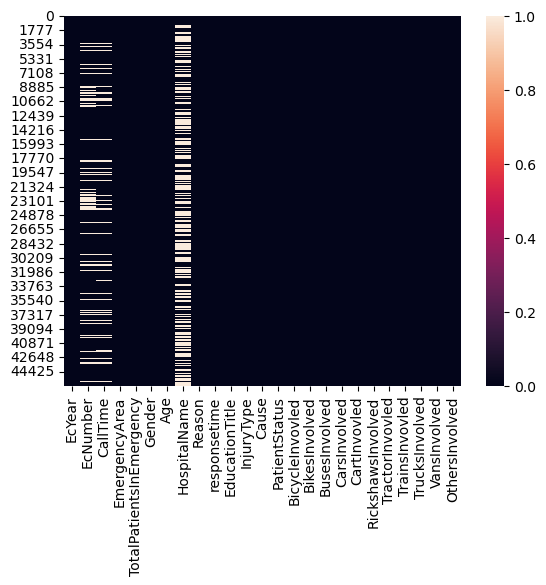

In [21]:
sns.heatmap(df.isnull())

# Target Variable
- Our Target Variables are:

  - InjuryType 
  - PatientStatus

# Correlation check

- If the relation is weak then we will drop the column

# EcNumber Correlation check respect to InjuryType

In [26]:
df['EcNumber'].value_counts()

EcNumber
284       3
1356      3
17        3
5157      3
19        3
         ..
15704     1
15705     1
15707     1
15709     1
356977    1
Name: count, Length: 34800, dtype: int64

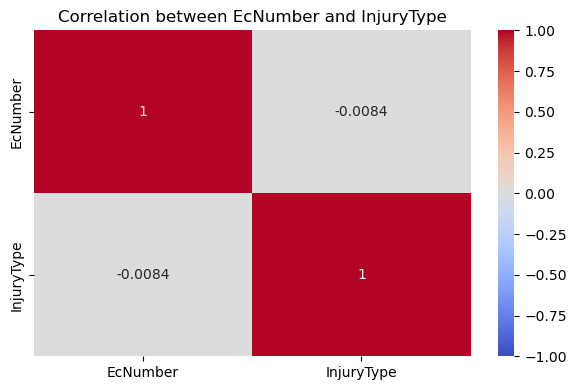

In [27]:
df_sub = df[['EcNumber', 'InjuryType']].copy()

df_sub['EcNumber'] = df_sub['EcNumber'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()


# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcNumber and InjuryType')
plt.tight_layout()
plt.show()

The value -0.0084 represents the correlation between EcNumber and InjuryType. A correlation of -0.0084 is very weak, meaning that there is no significant linear relationship between these two variables. That's why we deleted the EcNumber name region.

# EmergencyArea Correlation check respect to InjuryType

In [30]:
df['EmergencyArea'].value_counts()

EmergencyArea
 Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.       42
 Cod Chowk Adyala Road Rawalpindi                             38
 502 Chowk, Adyala Road, Rwp                                  33
Near Pc Hotel Signal Mall Road Rwp                            31
 22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi           29
                                                              ..
Adra Pull Abid Majeed Road Rwp                                 1
Jinnah Park Railway Track Rwp                                  1
Abid Majeed Road Front of CSD Rwp                              1
22 No Stop Rwp                                                 1
Near Rehmanabad Metro Station T/W Faizabad Murree Road Rwp     1
Name: count, Length: 37520, dtype: int64

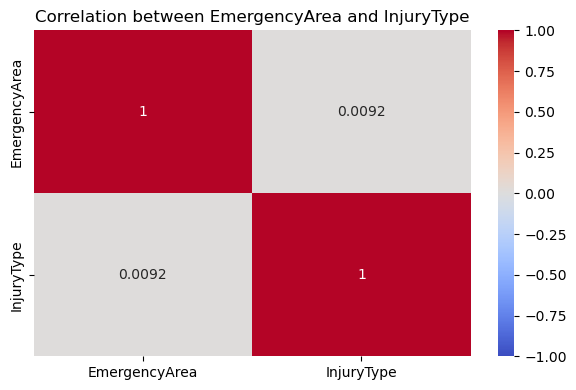

In [31]:
df_sub = df[['EmergencyArea', 'InjuryType']].copy()

df_sub['EmergencyArea'] = df_sub['EmergencyArea'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()


# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EmergencyArea and InjuryType')
plt.tight_layout()
plt.show()

The value 0.0092 represents the correlation between EmergencyArea and InjuryType. A correlation of 0.0092 is very weak, meaning that there is no significant linear relationship between these two variables. That's why we deleted the EmergencyArea name region.

# Info About Dropping

 EcNumber, EmergencyArea were removed as they do not exhibit any significant correlation with the target variable.

In [35]:
df = df.drop(['EcNumber', 'EmergencyArea'], axis=1)

# Dealing With Missing Values

- Plotting Slider to See Missing Values in  Calltime Vs InjuryType 

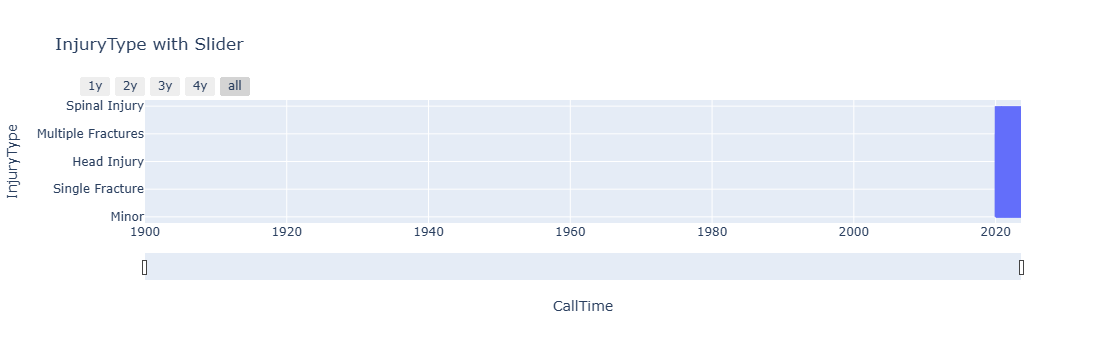

In [38]:
# Plot the line chart with a slider
fig = px.line(df, x="CallTime", y="InjuryType", title="InjuryType with Slider")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

- Display the Rows where 'column' has missing values


In [40]:
#This will display the rows where Gender column has missing values
rows_with_missing_values = df[df['Gender'].isnull()]
print(rows_with_missing_values)

      EcYear            CallTime TotalPatientsInEmergency Gender  Age  \
31355   2022 2022-06-18 13:23:00                        2    NaN  NaN   

      HospitalName Reason  responsetime EducationTitle InjuryType  ...  \
31355          NaN    NaN           NaN            NaN        NaN  ...   

      BikesInvolved BusesInvolved  CarsInvolved  CartInvovled  \
31355           NaN           NaN           NaN           NaN   

       RickshawsInvolved  TractorInvovled  TrainsInvovled  TrucksInvolved  \
31355                NaN              NaN             NaN             NaN   

       VansInvolved  OthersInvolved  
31355           NaN             NaN  

[1 rows x 23 columns]


- Display the Value Counts in the 'Gender' Column


In [42]:

df["Gender"].value_counts()

Gender
Male      39794
Female     6392
Other         1
0             1
Name: count, dtype: int64

- Replacing String of Max Count

In [44]:
df['Gender'] = df['Gender'].replace(np.nan, 'Male')

- Replacing 0 with the most Frequent Value

In [46]:
df['Gender'] = df['Gender'].replace({0: 'Male'})

- Again Counting Null Values

In [48]:
missing_data = df.isnull()

headers = df.columns

for column in headers:
    
    print (missing_data[column].value_counts())
    print(" ") 

EcYear
False    46189
Name: count, dtype: int64
 
CallTime
False    40233
True      5956
Name: count, dtype: int64
 
TotalPatientsInEmergency
False    46189
Name: count, dtype: int64
 
Gender
False    46189
Name: count, dtype: int64
 
Age
False    46188
True         1
Name: count, dtype: int64
 
HospitalName
False    24239
True     21950
Name: count, dtype: int64
 
Reason
False    46188
True         1
Name: count, dtype: int64
 
responsetime
False    46184
True         5
Name: count, dtype: int64
 
EducationTitle
False    46188
True         1
Name: count, dtype: int64
 
InjuryType
False    46187
True         2
Name: count, dtype: int64
 
Cause
False    46187
True         2
Name: count, dtype: int64
 
PatientStatus
False    46187
True         2
Name: count, dtype: int64
 
BicycleInvovled
False    46187
True         2
Name: count, dtype: int64
 
BikesInvolved
False    46187
True         2
Name: count, dtype: int64
 
BusesInvolved
False    46187
True         2
Name: count, dtype: int64
 


- Calculating and executing the average of peak-rpm

In [50]:
avg_age = df["Age"].astype("float").mean(axis=0)
avg_age

32.44712912444791

- Replacing Null Values with Average Value

In [52]:
df["Age"]=df["Age"].replace(np.nan, avg_age)

- VaLue Count For Reason Column

In [54]:
 df["Reason"].value_counts()

Reason
same                                                                             2328
Same                                                                             1323
Bike Slipped                                                                     1223
Same                                                                             1015
Bike Slip                                                                         957
                                                                                 ... 
 Car(FD-178 Honda Swift) Hitted the pedestrian due to over speed                    1
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043)       1
Car hit another car (MRAG 734) (u4156)                                              1
 Unknown van hit the bike (APF-22 US 70cc) and runaway                              1
 Both car hited eachother overspeed                                                 1
Name: count, Length: 23940, dtype: int64

- Replacing Null Values with Frequent Value

In [56]:
df['Reason'] = df['Reason'].replace(np.nan, 'same')

# Convert to string type to ensure uniformity

In [58]:
df["Reason"] = df["Reason"].astype(str)

In [59]:
 df["Reason"].value_counts()

Reason
same                                                                             2329
Same                                                                             1323
Bike Slipped                                                                     1223
Same                                                                             1015
Bike Slip                                                                         957
                                                                                 ... 
 Car(FD-178 Honda Swift) Hitted the pedestrian due to over speed                    1
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043)       1
Car hit another car (MRAG 734) (u4156)                                              1
 Unknown van hit the bike (APF-22 US 70cc) and runaway                              1
 Both car hited eachother overspeed                                                 1
Name: count, Length: 23940, dtype: int64

 - Calculating and executing the average of Response Time

In [61]:
avg_responsetime = df["responsetime"].astype("float").mean(axis=0)
avg_responsetime

6.256106443790058

- Replacing Null Values with Average Value

In [63]:
df["responsetime"]=df["responsetime"].replace(np.nan, avg_responsetime)

- VaLue Count For EducationTitle Column

In [65]:
 df["EducationTitle"].value_counts()

EducationTitle
Matric          15697
Primary         11717
Illetrate       10845
Intermediate     5675
Graduation       1686
Masters           439
Middle            119
PHD                 9
0                   1
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [67]:
df["EducationTitle"]=df["EducationTitle"].replace(np.nan, "Matric")

In [68]:
df['EducationTitle'] = df['EducationTitle'].replace({0: 'Matric'})

In [69]:
missing_data = df.isnull()

headers = df.columns

for column in headers:
    
    print (missing_data[column].value_counts())
    print(" ") 

EcYear
False    46189
Name: count, dtype: int64
 
CallTime
False    40233
True      5956
Name: count, dtype: int64
 
TotalPatientsInEmergency
False    46189
Name: count, dtype: int64
 
Gender
False    46189
Name: count, dtype: int64
 
Age
False    46189
Name: count, dtype: int64
 
HospitalName
False    24239
True     21950
Name: count, dtype: int64
 
Reason
False    46189
Name: count, dtype: int64
 
responsetime
False    46189
Name: count, dtype: int64
 
EducationTitle
False    46189
Name: count, dtype: int64
 
InjuryType
False    46187
True         2
Name: count, dtype: int64
 
Cause
False    46187
True         2
Name: count, dtype: int64
 
PatientStatus
False    46187
True         2
Name: count, dtype: int64
 
BicycleInvovled
False    46187
True         2
Name: count, dtype: int64
 
BikesInvolved
False    46187
True         2
Name: count, dtype: int64
 
BusesInvolved
False    46187
True         2
Name: count, dtype: int64
 
CarsInvolved
False    46187
True         2
Name: count, dtyp

- VaLue Count For InjuryType Column

In [71]:
 df["InjuryType"].value_counts()

InjuryType
Minor                 34788
Single Fracture        6737
Head Injury            3503
Multiple Fractures      778
Spinal Injury           381
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [73]:
df["InjuryType"]=df["InjuryType"].replace(np.nan, "Minor")

- VaLue Count For Cause Column

In [75]:
 df["Cause"].value_counts()

Cause
Over Speed      29586
Carelessness    14177
U Turn            934
Wrong Turn        841
Tyre Burst        481
Others            104
One Wheeling       64
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [77]:
df["Cause"]=df["Cause"].replace(np.nan, "Over Speed")

In [78]:
missing_data = df.isnull()

headers = df.columns

for column in headers:
    
    print (missing_data[column].value_counts())
    print(" ")

EcYear
False    46189
Name: count, dtype: int64
 
CallTime
False    40233
True      5956
Name: count, dtype: int64
 
TotalPatientsInEmergency
False    46189
Name: count, dtype: int64
 
Gender
False    46189
Name: count, dtype: int64
 
Age
False    46189
Name: count, dtype: int64
 
HospitalName
False    24239
True     21950
Name: count, dtype: int64
 
Reason
False    46189
Name: count, dtype: int64
 
responsetime
False    46189
Name: count, dtype: int64
 
EducationTitle
False    46189
Name: count, dtype: int64
 
InjuryType
False    46189
Name: count, dtype: int64
 
Cause
False    46189
Name: count, dtype: int64
 
PatientStatus
False    46187
True         2
Name: count, dtype: int64
 
BicycleInvovled
False    46187
True         2
Name: count, dtype: int64
 
BikesInvolved
False    46187
True         2
Name: count, dtype: int64
 
BusesInvolved
False    46187
True         2
Name: count, dtype: int64
 
CarsInvolved
False    46187
True         2
Name: count, dtype: int64
 
CartInvovled
False 

- VaLue Count For PatientStatus Column

In [80]:
 df["PatientStatus"].value_counts()

PatientStatus
Alive & unstable    23788
Alive & stable      21812
Dead                  587
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [82]:
df["PatientStatus"]=df["PatientStatus"].replace(np.nan, "Alive & unstable")

- VaLue Count For BicycleInvovled Column

In [84]:
 df["BicycleInvovled"].value_counts()

BicycleInvovled
0.0    45786
1.0      399
2.0        2
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [86]:
df["BicycleInvovled"]=df["BicycleInvovled"].replace(np.nan, 0)

In [87]:
missing_data = df.isnull()

headers = df.columns

for column in headers:
    
    print (missing_data[column].value_counts())
    print(" ")

EcYear
False    46189
Name: count, dtype: int64
 
CallTime
False    40233
True      5956
Name: count, dtype: int64
 
TotalPatientsInEmergency
False    46189
Name: count, dtype: int64
 
Gender
False    46189
Name: count, dtype: int64
 
Age
False    46189
Name: count, dtype: int64
 
HospitalName
False    24239
True     21950
Name: count, dtype: int64
 
Reason
False    46189
Name: count, dtype: int64
 
responsetime
False    46189
Name: count, dtype: int64
 
EducationTitle
False    46189
Name: count, dtype: int64
 
InjuryType
False    46189
Name: count, dtype: int64
 
Cause
False    46189
Name: count, dtype: int64
 
PatientStatus
False    46189
Name: count, dtype: int64
 
BicycleInvovled
False    46189
Name: count, dtype: int64
 
BikesInvolved
False    46187
True         2
Name: count, dtype: int64
 
BusesInvolved
False    46187
True         2
Name: count, dtype: int64
 
CarsInvolved
False    46187
True         2
Name: count, dtype: int64
 
CartInvovled
False    46187
True         2
Name: 

- VaLue Count For BikesInvolved Column

In [89]:
 df["BikesInvolved"].value_counts()

BikesInvolved
1.0     30862
0.0      8433
2.0      6878
3.0        12
10.0        2
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [91]:
df["BikesInvolved"]=df["BikesInvolved"].replace(np.nan, 1)

- VaLue Count For BusesInvolved Column

In [93]:
 df["BusesInvolved"].value_counts()

BusesInvolved
0.0    45784
1.0      381
2.0       22
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [95]:
df["BusesInvolved"]=df["BusesInvolved"].replace(np.nan, 0)

- VaLue Count For CarsInvolved Column

In [97]:
 df["CarsInvolved"].value_counts()

CarsInvolved
0.0    35825
1.0     9946
2.0      395
3.0       15
5.0        5
4.0        1
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [99]:
df["CarsInvolved"]=df["CarsInvolved"].replace(np.nan, 0)

- VaLue Count For CartInvovled Column

In [101]:
 df["CartInvovled"].value_counts()

CartInvovled
0.0    46096
1.0       91
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [103]:
df["CartInvovled"]=df["CartInvovled"].replace(np.nan, 0)

- VaLue Count For RickshawsInvolved Column

In [105]:
 df["RickshawsInvolved"].value_counts()

RickshawsInvolved
0.0    42248
1.0     3846
2.0       93
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [107]:
df["RickshawsInvolved"]=df["RickshawsInvolved"].replace(np.nan, 0)

- VaLue Count For TractorInvovled Column

In [109]:
 df["TractorInvovled"].value_counts()

TractorInvovled
0.0    45733
1.0      454
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [111]:
df["TractorInvovled"]=df["TractorInvovled"].replace(np.nan, 0)

- VaLue Count For TrainsInvovled Column

In [113]:
 df["TrainsInvovled"].value_counts()

TrainsInvovled
0.0    46085
1.0      102
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [115]:
df["TrainsInvovled"]=df["TrainsInvovled"].replace(np.nan, 0)

- VaLue Count For TrucksInvolved Column

In [117]:
 df["TrucksInvolved"].value_counts()

TrucksInvolved
0.0    44245
1.0     1810
2.0      130
3.0        2
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [119]:
df["TrucksInvolved"]=df["TrucksInvolved"].replace(np.nan, 0)

- VaLue Count For VansInvolved Column

In [121]:
 df["VansInvolved"].value_counts()

VansInvolved
0.0    40953
1.0     5051
2.0      179
3.0        3
4.0        1
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [123]:
df["VansInvolved"]=df["VansInvolved"].replace(np.nan, 0)

- VaLue Count For OthersInvolved Column

In [125]:
 df["OthersInvolved"].value_counts()

OthersInvolved
0.0    45746
1.0      436
2.0        5
Name: count, dtype: int64

- Replacing Null Values with Frequent Value

In [127]:
df["OthersInvolved"]=df["OthersInvolved"].replace(np.nan, 0)

In [128]:
missing_data = df.isnull()

headers = df.columns

for column in headers:
    
    print (missing_data[column].value_counts())
    print(" ")

EcYear
False    46189
Name: count, dtype: int64
 
CallTime
False    40233
True      5956
Name: count, dtype: int64
 
TotalPatientsInEmergency
False    46189
Name: count, dtype: int64
 
Gender
False    46189
Name: count, dtype: int64
 
Age
False    46189
Name: count, dtype: int64
 
HospitalName
False    24239
True     21950
Name: count, dtype: int64
 
Reason
False    46189
Name: count, dtype: int64
 
responsetime
False    46189
Name: count, dtype: int64
 
EducationTitle
False    46189
Name: count, dtype: int64
 
InjuryType
False    46189
Name: count, dtype: int64
 
Cause
False    46189
Name: count, dtype: int64
 
PatientStatus
False    46189
Name: count, dtype: int64
 
BicycleInvovled
False    46189
Name: count, dtype: int64
 
BikesInvolved
False    46189
Name: count, dtype: int64
 
BusesInvolved
False    46189
Name: count, dtype: int64
 
CarsInvolved
False    46189
Name: count, dtype: int64
 
CartInvovled
False    46189
Name: count, dtype: int64
 
RickshawsInvolved
False    46189
Name:

- There Was a Non-Numerical Value in EcYear. 


- We Replaced it with Nan 

In [131]:
# Replace non-numeric values of EcYear with NaN
df['EcYear'] = pd.to_numeric(df['EcYear'], errors='coerce')
# Drop rows with NaN values
df_cleaned = df.dropna(subset=['EcYear'])

- Seeing the Value Counts

In [133]:
 df["EcYear"].value_counts()

EcYear
2022.0    12902
2021.0    12677
2020.0    11382
2023.0     9227
Name: count, dtype: int64

- Replace it with the Most Frequent Value

In [135]:
df["EcYear"]=df["EcYear"].replace(np.nan, 2022)

- There Was a Non-Numerical Value in TotalPatientsInEmergency.

- We Replaced it with Nan

In [138]:
# Replace non-numeric values of EcYear with NaN
df['TotalPatientsInEmergency'] = pd.to_numeric(df['TotalPatientsInEmergency'], errors='coerce')
# Drop rows with NaN values
df_cleaned = df.dropna(subset=['TotalPatientsInEmergency'])

In [139]:
 df["TotalPatientsInEmergency"].value_counts()

TotalPatientsInEmergency
1.0     36151
2.0      7313
3.0      1581
4.0       484
5.0       260
6.0       132
7.0        98
8.0        56
9.0        45
11.0       33
10.0       20
15.0       15
Name: count, dtype: int64

- Replace it with the Most Frequent Value

In [141]:
df["TotalPatientsInEmergency"]=df["TotalPatientsInEmergency"].replace(np.nan, 1)

- Dropping The entire Column of HospitalName Because It has 47.52 percentage of missing values

In [143]:
df = df.drop('HospitalName', axis=1)

- CallTime

- Forward Filling

In [146]:
df['CallTime'] = df['CallTime'].ffill()

# Counting Missing Values

In [148]:
missing_data = df.isnull()

headers = df.columns

for column in headers:
    
    print (missing_data[column].value_counts())
    print(" ")

EcYear
False    46189
Name: count, dtype: int64
 
CallTime
False    46189
Name: count, dtype: int64
 
TotalPatientsInEmergency
False    46189
Name: count, dtype: int64
 
Gender
False    46189
Name: count, dtype: int64
 
Age
False    46189
Name: count, dtype: int64
 
Reason
False    46189
Name: count, dtype: int64
 
responsetime
False    46189
Name: count, dtype: int64
 
EducationTitle
False    46189
Name: count, dtype: int64
 
InjuryType
False    46189
Name: count, dtype: int64
 
Cause
False    46189
Name: count, dtype: int64
 
PatientStatus
False    46189
Name: count, dtype: int64
 
BicycleInvovled
False    46189
Name: count, dtype: int64
 
BikesInvolved
False    46189
Name: count, dtype: int64
 
BusesInvolved
False    46189
Name: count, dtype: int64
 
CarsInvolved
False    46189
Name: count, dtype: int64
 
CartInvovled
False    46189
Name: count, dtype: int64
 
RickshawsInvolved
False    46189
Name: count, dtype: int64
 
TractorInvovled
False    46189
Name: count, dtype: int64
 
Trai

# Outliers Detection

- EcYear

<Axes: xlabel='EcYear', ylabel='Density'>

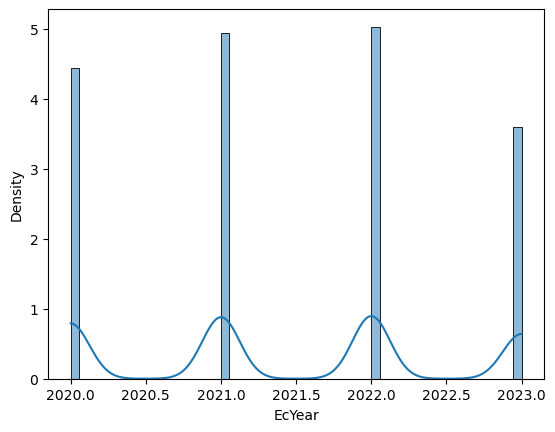

In [151]:
sns.histplot(df["EcYear"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

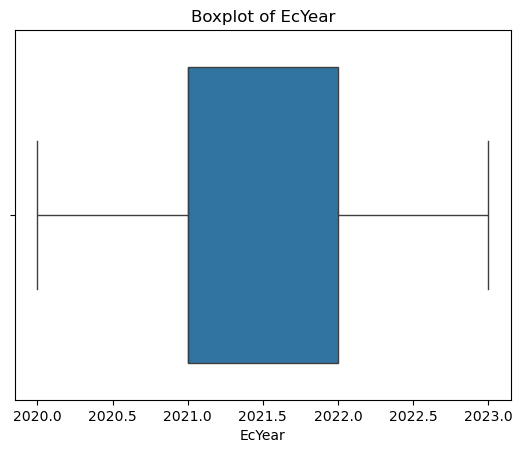

In [153]:
sns.boxplot(x=df["EcYear"])
plt.xlabel('EcYear')
plt.title('Boxplot of EcYear')
plt.show()

- So we can clearly see there is no outliers in EcYear

# TotalPatientsInEmergency

In [156]:
sns.histplot(df["TotalPatientsInEmergency"], kde=True, stat="density")

<Axes: xlabel='TotalPatientsInEmergency', ylabel='Density'>

- To see Outliers Clearly we use Boxplot

In [158]:
sns.boxplot(x=df["TotalPatientsInEmergency"])
plt.xlabel('TotalPatientsInEmergency')
plt.title('Boxplot of TotalPatientsInEmergency')
plt.show()

- Here we can see outliers from the Boxplot

# We are using IQR Method

In [161]:
q1= df["TotalPatientsInEmergency"].quantile(0.25)
q3= df["TotalPatientsInEmergency"].quantile(0.75)
iqr= q3-q1

- To see the Values

In [163]:
q1, q3, iqr

(1.0, 1.0, 0.0)

- Finding the limits

In [165]:
upper_limit= q3+(1.5*iqr)
lower_limit= q1-(1.5*iqr)
lower_limit, upper_limit

(1.0, 1.0)

- Now We use Clapping method:

In [167]:
new_df=df.copy()

new_df.loc[(new_df["TotalPatientsInEmergency"]>upper_limit), "TotalPatientsInEmergency"]= upper_limit
new_df.loc[(new_df["TotalPatientsInEmergency"]<lower_limit), "TotalPatientsInEmergency"]= lower_limit

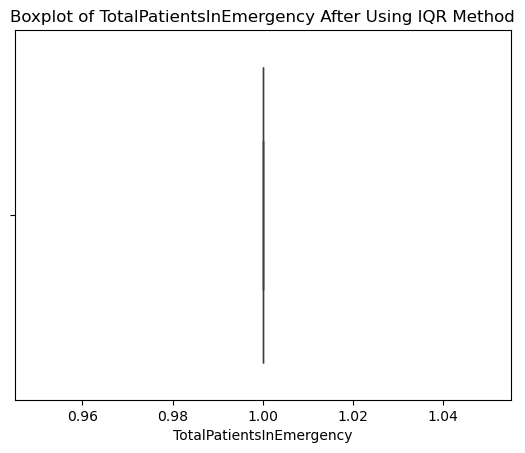

In [168]:
sns.boxplot(x=new_df["TotalPatientsInEmergency"])
plt.xlabel('TotalPatientsInEmergency')
plt.title('Boxplot of TotalPatientsInEmergency After Using IQR Method')
plt.show()

- Here now there is no Outliers

 # Age

In [171]:
sns.histplot(df["Age"], kde=True, stat="density")

<Axes: xlabel='Age', ylabel='Density'>

- To see Outliers Clearly we use Boxplot

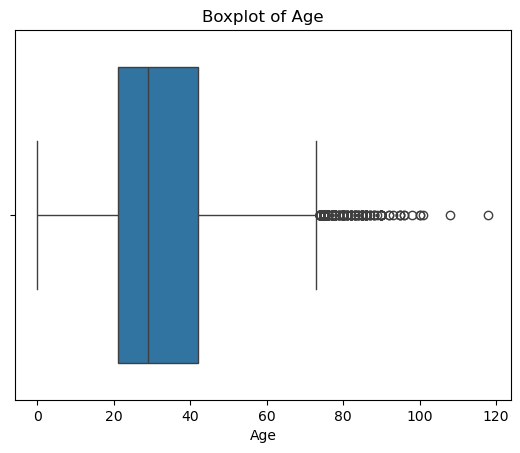

In [173]:
sns.boxplot(x=df["Age"])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

- Here we can see outliers from the Boxplot

# We are using IQR Method

In [176]:
q1= df["Age"].quantile(0.25)
q3= df["Age"].quantile(0.75)
iqr= q3-q1

- To Show the Values

In [178]:
q1, q3, iqr

(21.0, 42.0, 21.0)

- Finding the limits

In [180]:
upper_limit= q3+(1.5*iqr)
lower_limit= q1-(1.5*iqr)
lower_limit, upper_limit

(-10.5, 73.5)

- Showing the Outliers Values

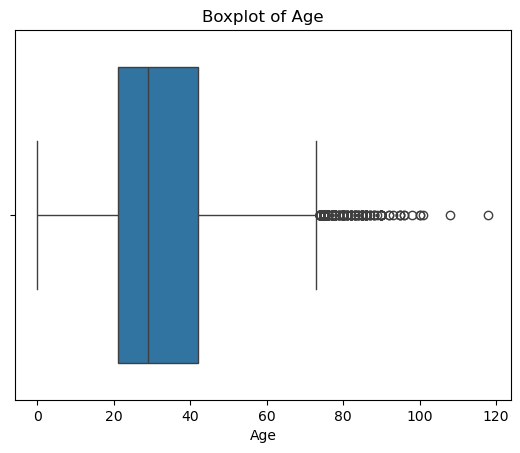

In [182]:
sns.boxplot(x=df["Age"])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

# Now We use Clapping method:


In [184]:
new_df=df.copy()

new_df.loc[(new_df["Age"]>upper_limit), "Age"]= upper_limit
new_df.loc[(new_df["Age"]<lower_limit), "Age"]= lower_limit

In [185]:
sns.boxplot(x=new_df["Age"])
plt.xlabel('Age')
plt.title('Boxplot of Age After Using IQR Method')
plt.show()

- Here Now we can see there is no Outliers

# responsetime

<Axes: xlabel='responsetime', ylabel='Density'>

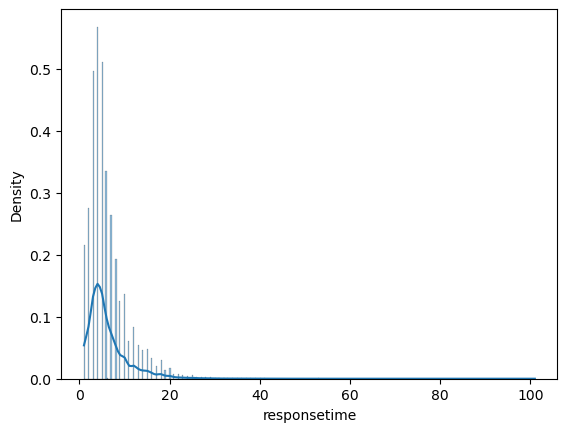

In [188]:
sns.histplot(df["responsetime"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

In [190]:
sns.boxplot(x=df["responsetime"])
plt.xlabel('responsetime')
plt.title('Boxplot of responsetime')
plt.show()

- Here we can see outliers from the Boxplot

# We are using IQR Method

In [193]:
q1= df["responsetime"].quantile(0.25)
q3= df["responsetime"].quantile(0.75)
iqr= q3-q1

- To Show the Values

In [195]:
q1, q3, iqr

(3.0, 8.0, 5.0)

- Finding the limits

In [197]:
upper_limit= q3+(1.5*iqr)
lower_limit= q1-(1.5*iqr)
lower_limit, upper_limit

(-4.5, 15.5)

- Showing the Outliers Values

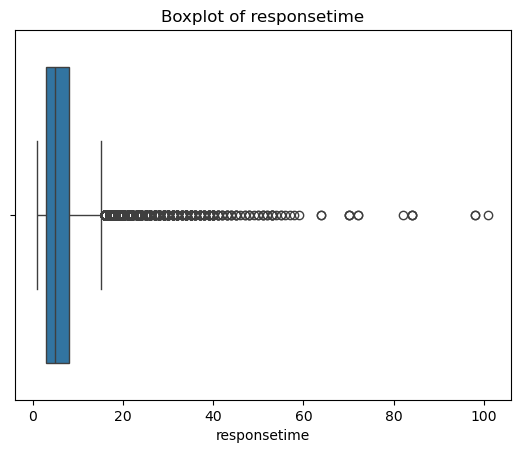

In [199]:
sns.boxplot(x=df["responsetime"])
plt.xlabel('responsetime')
plt.title('Boxplot of responsetime')
plt.show()

# Now We use Clapping method:

In [201]:
new_df=df.copy()

new_df.loc[(new_df["responsetime"]>upper_limit), "responsetime"]= upper_limit
new_df.loc[(new_df["responsetime"]<lower_limit), "responsetime"]= lower_limit

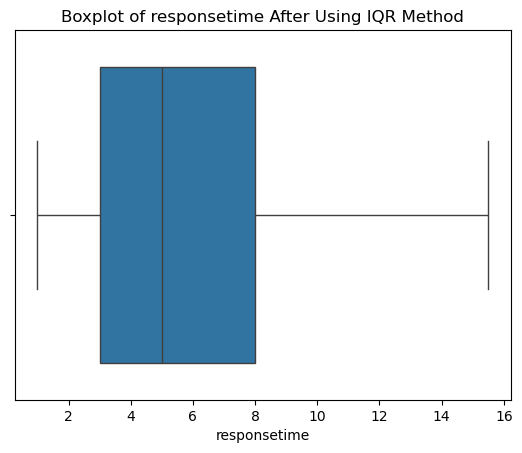

In [202]:
sns.boxplot(x=new_df["responsetime"])
plt.xlabel('responsetime')
plt.title('Boxplot of responsetime After Using IQR Method')
plt.show()

- Here we can see there is no Outliers

# BicycleInvovled

<Axes: xlabel='BicycleInvovled', ylabel='Density'>

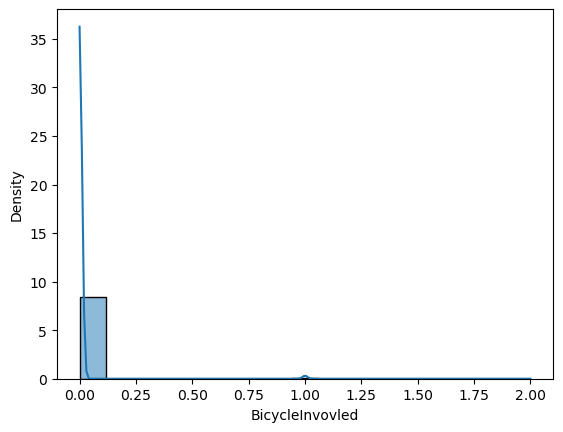

In [205]:
sns.histplot(df["BicycleInvovled"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

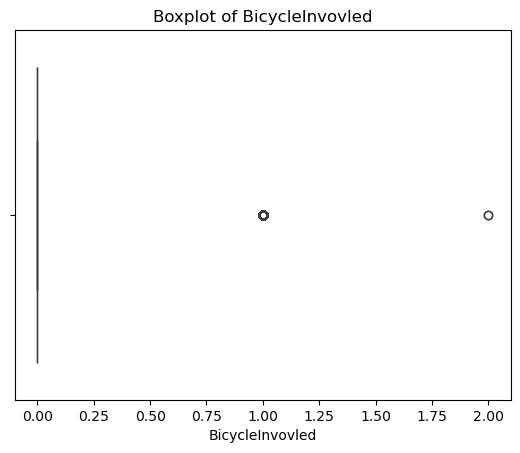

In [207]:
sns.boxplot(x=df["BicycleInvovled"])
plt.xlabel('BicycleInvovled')
plt.title('Boxplot of BicycleInvovled')
plt.show()

 # BikesInvolved

<Axes: xlabel='BikesInvolved', ylabel='Density'>

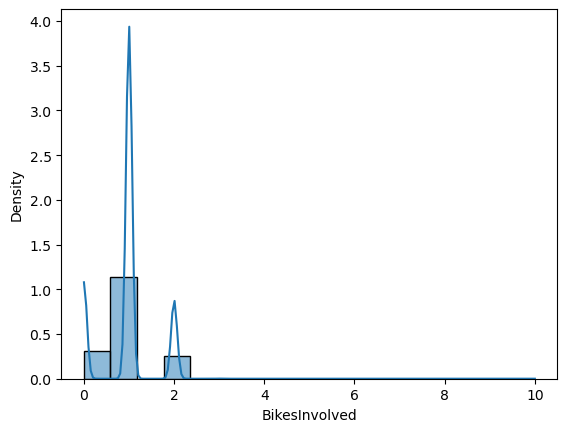

In [209]:
sns.histplot(df["BikesInvolved"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

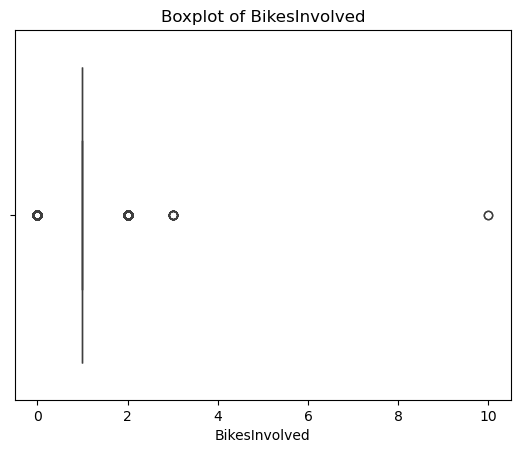

In [211]:
sns.boxplot(x=df["BikesInvolved"])
plt.xlabel('BikesInvolved')
plt.title('Boxplot of BikesInvolved')
plt.show()

- Here we can see outliers from the Boxplot

# We can use IQR method

In [214]:
q1= df["BikesInvolved"].quantile(0.25)
q3= df["BikesInvolved"].quantile(0.75)
iqr= q3-q1

In [215]:
q1, q3, iqr

(1.0, 1.0, 0.0)

- Finding the limits

In [217]:
upper_limit= q3+(1.5*iqr)
lower_limit= q1-(1.5*iqr)
lower_limit, upper_limit

(1.0, 1.0)

# Now We use Clapping method:

In [219]:
new_df=df.copy()

new_df.loc[(new_df["BikesInvolved"]>upper_limit), "BikesInvolved"]= upper_limit
new_df.loc[(new_df["BikesInvolved"]<lower_limit), "BikesInvolved"]= lower_limit

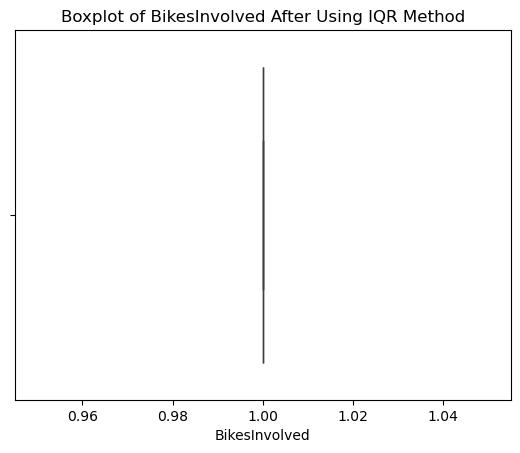

In [220]:
sns.boxplot(x=new_df["BikesInvolved"])
plt.xlabel('BikesInvolved')
plt.title('Boxplot of BikesInvolved After Using IQR Method')
plt.show()

- Here we can see the outliers are removed

# BusesInvolved

<Axes: xlabel='BusesInvolved', ylabel='Density'>

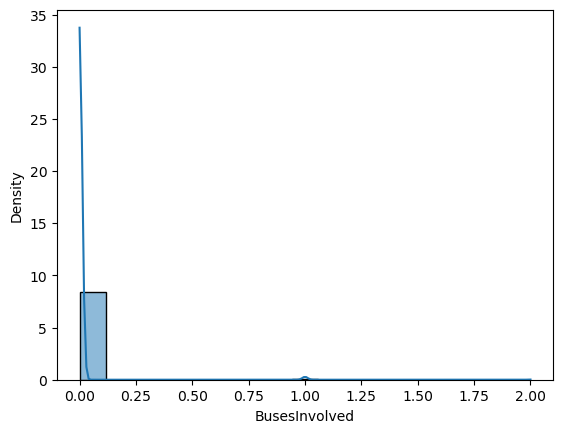

In [223]:
sns.histplot(df["BusesInvolved"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

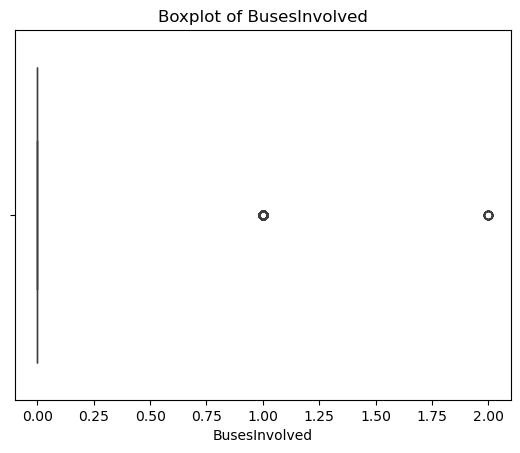

In [225]:
sns.boxplot(x=df["BusesInvolved"])
plt.xlabel('BusesInvolved')
plt.title('Boxplot of BusesInvolved')
plt.show()

# CarsInvolved

<Axes: xlabel='CarsInvolved', ylabel='Density'>

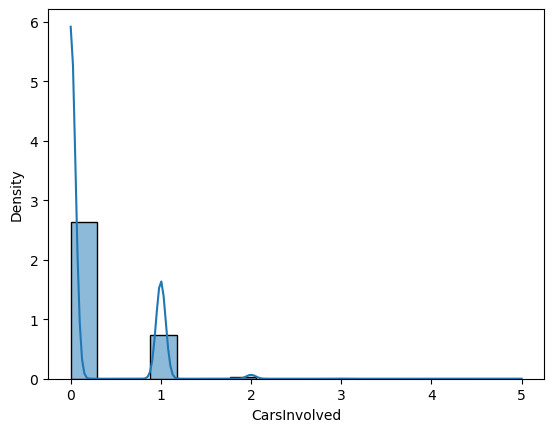

In [227]:
sns.histplot(df["CarsInvolved"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

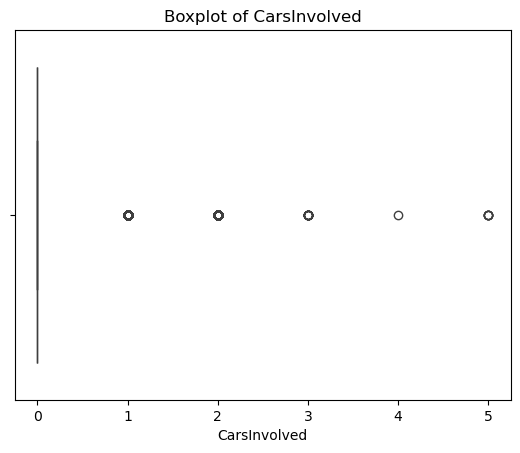

In [229]:
sns.boxplot(x=df["CarsInvolved"])
plt.xlabel('CarsInvolved')
plt.title('Boxplot of CarsInvolved')
plt.show()

- Here we can see outliers from the Boxplot

# We can use IQR Method

In [232]:
q1= df["CarsInvolved"].quantile(0.25)
q3= df["CarsInvolved"].quantile(0.75)
iqr= q3-q1

In [233]:
q1, q3, iqr

(0.0, 0.0, 0.0)

- Find the Limits

In [235]:
upper_limit= q3+(1.5*iqr)
lower_limit= q1-(1.5*iqr)
lower_limit, upper_limit

(0.0, 0.0)

- Now We use Clapping method:

In [237]:
new_df=df.copy()

new_df.loc[(new_df["CarsInvolved"]>upper_limit), "CarsInvolved"]= upper_limit
new_df.loc[(new_df["CarsInvolved"]<lower_limit), "CarsInvolved"]= lower_limit

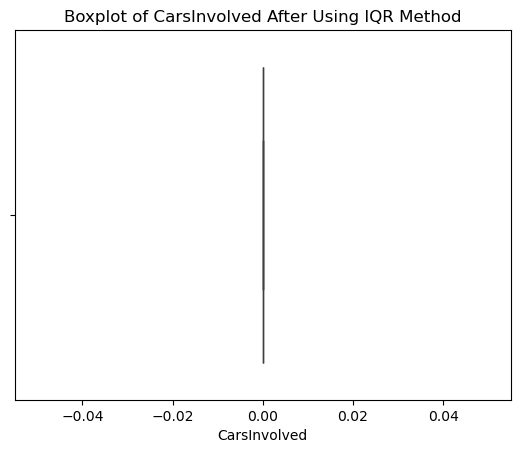

In [238]:
sns.boxplot(x=new_df["CarsInvolved"])
plt.xlabel('CarsInvolved')
plt.title('Boxplot of CarsInvolved After Using IQR Method')
plt.show()

 # CartInvolved

<Axes: xlabel='CartInvovled', ylabel='Density'>

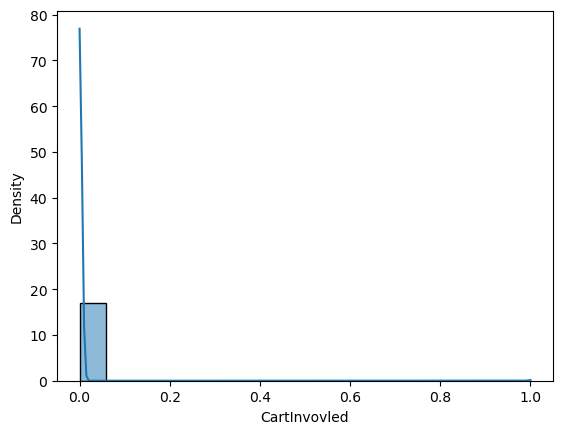

In [240]:
sns.histplot(df["CartInvovled"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

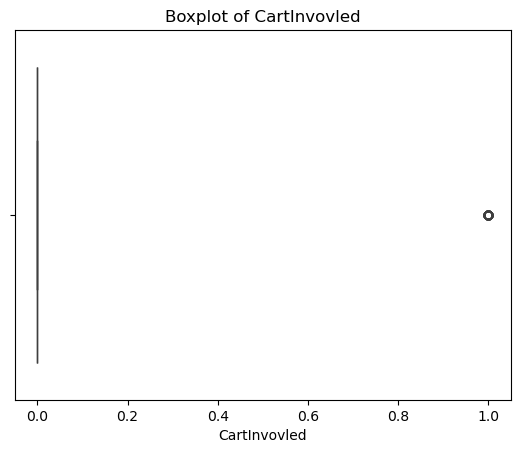

In [242]:
sns.boxplot(x=df["CartInvovled"])
plt.xlabel('CartInvovled')
plt.title('Boxplot of CartInvovled')
plt.show()

# RickshawsInvolved

<Axes: xlabel='RickshawsInvolved', ylabel='Density'>

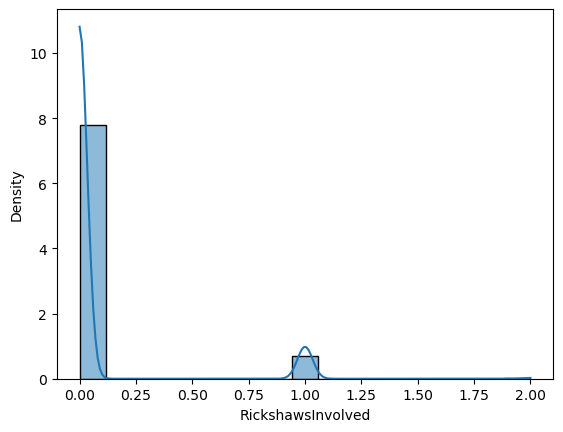

In [244]:
sns.histplot(df["RickshawsInvolved"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

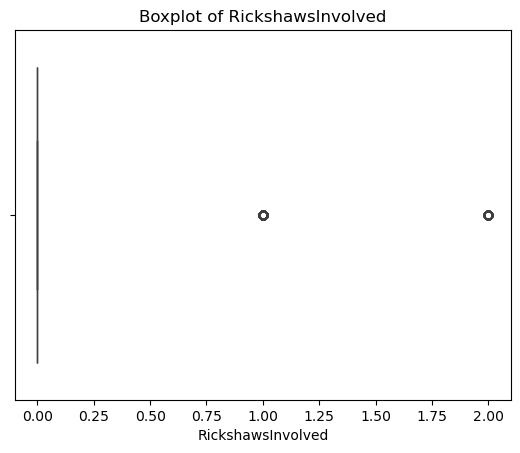

In [246]:
sns.boxplot(x=df["RickshawsInvolved"])
plt.xlabel('RickshawsInvolved')
plt.title('Boxplot of RickshawsInvolved')
plt.show()

# TractorInvovled

<Axes: xlabel='TractorInvovled', ylabel='Density'>

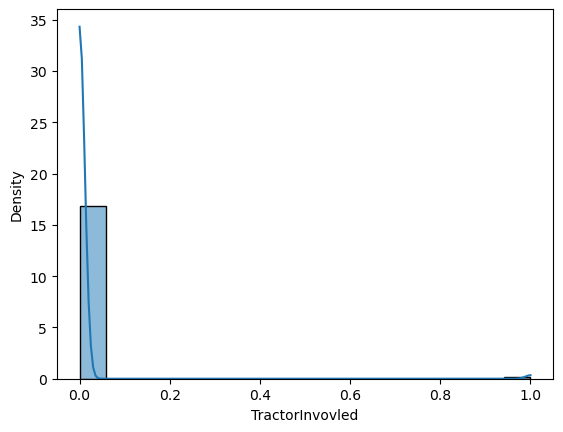

In [248]:
sns.histplot(df["TractorInvovled"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

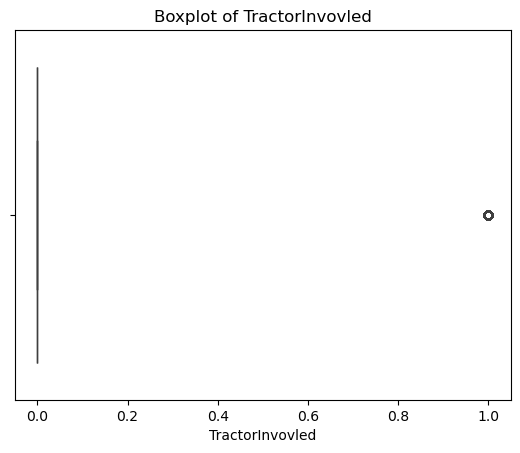

In [250]:
sns.boxplot(x=df["TractorInvovled"])
plt.xlabel('TractorInvovled')
plt.title('Boxplot of TractorInvovled')
plt.show()

# TrainsInvovled

<Axes: xlabel='TrainsInvovled', ylabel='Density'>

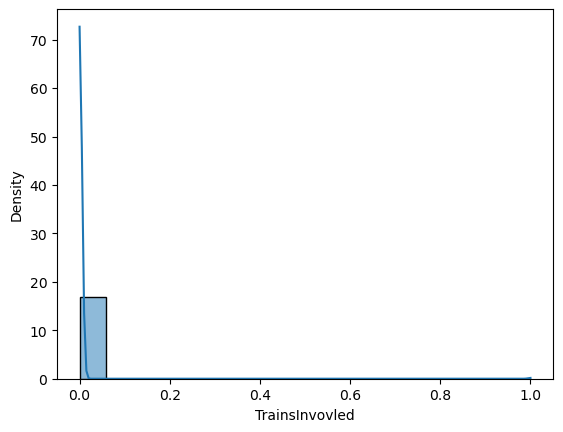

In [252]:
sns.histplot(df["TrainsInvovled"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

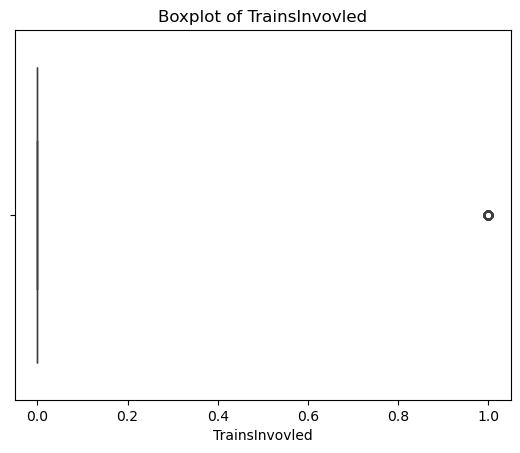

In [254]:
sns.boxplot(x=df["TrainsInvovled"])
plt.xlabel('TrainsInvovled')
plt.title('Boxplot of TrainsInvovled')
plt.show()

# TrucksInvolved

<Axes: xlabel='TrucksInvolved', ylabel='Density'>

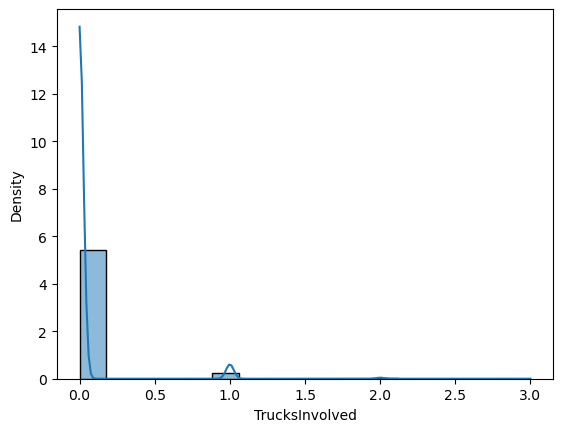

In [256]:
sns.histplot(df["TrucksInvolved"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

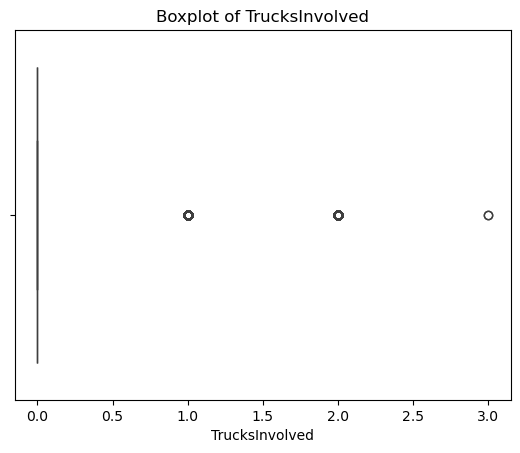

In [258]:
sns.boxplot(x=df["TrucksInvolved"])
plt.xlabel('TrucksInvolved')
plt.title('Boxplot of TrucksInvolved')
plt.show()

# VansInvolved

<Axes: xlabel='VansInvolved', ylabel='Density'>

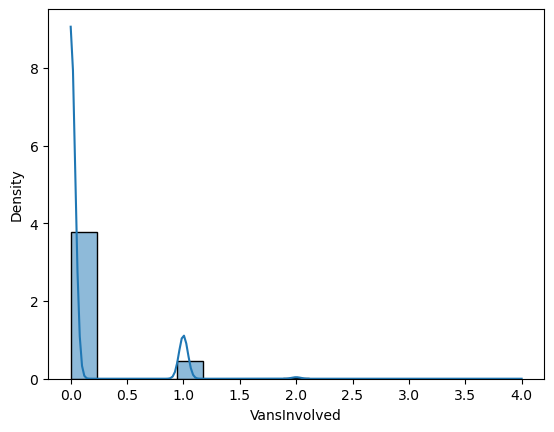

In [260]:
sns.histplot(df["VansInvolved"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

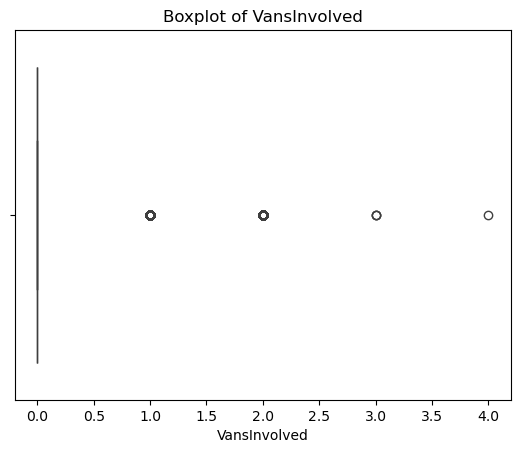

In [262]:
sns.boxplot(x=df["VansInvolved"])
plt.xlabel('VansInvolved')
plt.title('Boxplot of VansInvolved')
plt.show()

- Here we can see some outliers

# We can use IQR method

In [265]:
q1= df["VansInvolved"].quantile(0.25)
q3= df["VansInvolved"].quantile(0.75)
iqr= q3-q1

In [266]:
q1, q3, iqr

(0.0, 0.0, 0.0)

- Find the Limits

In [268]:
upper_limit= q3+(1.5*iqr)
lower_limit= q1-(1.5*iqr)
lower_limit, upper_limit

(0.0, 0.0)

# Now We use Clapping method:

In [270]:
new_df=df.copy()

new_df.loc[(new_df["VansInvolved"]>upper_limit), "VansInvolved"]= upper_limit
new_df.loc[(new_df["VansInvolved"]<lower_limit), "VansInvolved"]= lower_limit

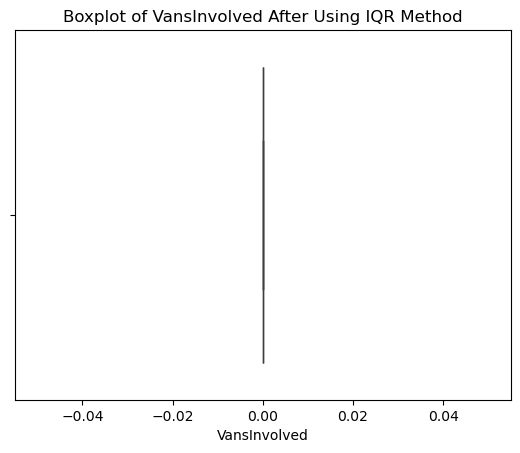

In [271]:
sns.boxplot(x=new_df["VansInvolved"])
plt.xlabel('VansInvolved')
plt.title('Boxplot of VansInvolved After Using IQR Method')
plt.show()

# OthersInvolved

<Axes: xlabel='OthersInvolved', ylabel='Density'>

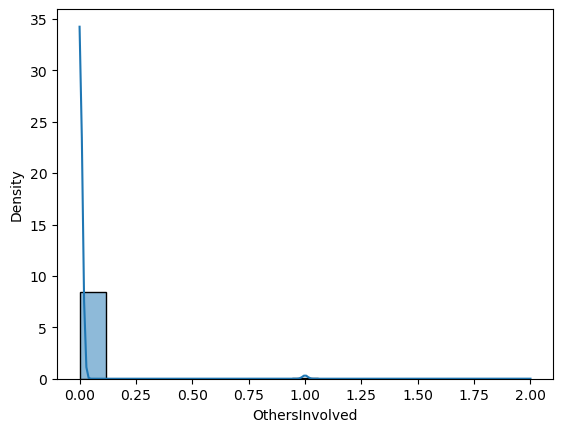

In [273]:
sns.histplot(df["OthersInvolved"], kde=True, stat="density")

- To see Outliers Clearly we use Boxplot

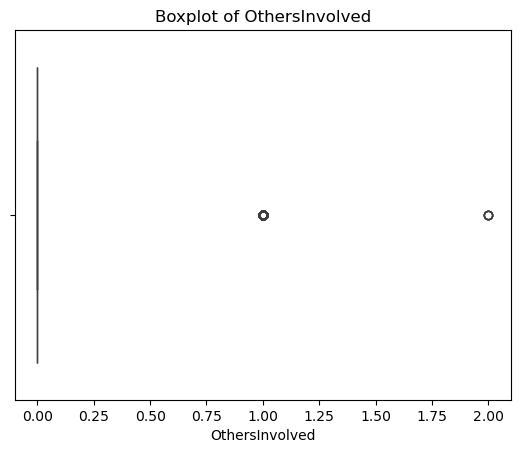

In [275]:
sns.boxplot(x=df["OthersInvolved"])
plt.xlabel('OthersInvolved')
plt.title('Boxplot of OthersInvolved')
plt.show()

###################################################################################################

# Handling Catagorical Data

In [278]:
df_cat= df.select_dtypes(include=['object'])

In [279]:
df_num = df.select_dtypes(include=['int64', 'float64'])

- We use Label Encoding

# Label Encoding

In [282]:
from sklearn.preprocessing import LabelEncoder

In [283]:
le= LabelEncoder()

In [284]:
for col in df_cat:
    le= LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
    

In [285]:
df_cat.head(5)

Gender  Reason  EducationTitle  InjuryType  Cause  PatientStatus
0       1   11685               2           1      3              1
1       1   15524               1           1      3              0
2       1   19245               1           3      3              1
3       1   15493               4           1      3              0
4       1   20811               4           3      3              0

- Merge Catagorical and Numerical Values

In [287]:
df_le = pd.concat([df_cat, df_num], axis=1)

In [288]:
df_le.head(5)

Gender  Reason  EducationTitle  InjuryType  Cause  PatientStatus  EcYear  \
0       1   11685               2           1      3              1  2020.0   
1       1   15524               1           1      3              0  2020.0   
2       1   19245               1           3      3              1  2020.0   
3       1   15493               4           1      3              0  2020.0   
4       1   20811               4           3      3              0  2020.0   

   TotalPatientsInEmergency   Age  responsetime  ...  BikesInvolved  \
0                       1.0  27.0          10.0  ...            1.0   
1                       1.0  20.0          12.0  ...            0.0   
2                       1.0  48.0          10.0  ...            0.0   
3                       1.0  45.0           5.0  ...            0.0   
4                       1.0  22.0           5.0  ...            2.0   

   BusesInvolved  CarsInvolved  CartInvovled  RickshawsInvolved  \
0            0.0           0.0           0.0                0.0   
1            0.0           1.0           0.0                0.0   
2            0.0           1.0           0.0                1.0   
3            0.0           2.0           0.0                0.0   
4            0.0           0.0           0.0                0.0   

   TractorInvovled  TrainsInvovled  TrucksInvolved  VansInvolved  \
0              0.0             0.0             0.0           0.0   
1              0.0             0.0             0.0           0.0   
2              0.0             0.0             0.0           0.0   
3              0.0             0.0             0.0           0.0   
4              0.0             0.0             0.0           0.0   

   OthersInvolved  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 21 columns]

# Scalling

# Standardization 

  -  X (new) = X - Mean / Standard Deviation

In [291]:
from sklearn.preprocessing import StandardScaler

In [292]:
for col in df_le:
    ss= StandardScaler()
    df_le[col] = ss.fit_transform(df_le[[col]])

In [293]:
df_le.head()

Gender    Reason  EducationTitle  InjuryType     Cause  PatientStatus  \
0  0.400659 -0.401649       -0.715777   -0.311292  0.534862       0.878231   
1  0.400659  0.194084       -1.147394   -0.311292  0.534862      -1.032941   
2  0.400659  0.771507       -1.147394    2.106849  0.534862       0.878231   
3  0.400659  0.189274        0.147458   -0.311292  0.534862      -1.032941   
4  0.400659  1.014517        0.147458    2.106849  0.534862      -1.032941   

     EcYear  TotalPatientsInEmergency       Age  responsetime  ...  \
0 -1.342911                 -0.378761 -0.358933      0.763900  ...   
1 -1.342911                 -0.378761 -0.820190      1.171978  ...   
2 -1.342911                 -0.378761  1.024840      0.763900  ...   
3 -1.342911                 -0.378761  0.827158     -0.256295  ...   
4 -1.342911                 -0.378761 -0.688403     -0.256295  ...   

   BikesInvolved  BusesInvolved  CarsInvolved  CartInvovled  \
0       0.056598      -0.091696     -0.522358      -0.04443   
1      -1.671243      -0.091696      1.709576      -0.04443   
2      -1.671243      -0.091696      1.709576      -0.04443   
3      -1.671243      -0.091696      3.941511      -0.04443   
4       1.784440      -0.091696     -0.522358      -0.04443   

   RickshawsInvolved  TractorInvovled  TrainsInvovled  TrucksInvolved  \
0           -0.30173        -0.099633       -0.047045        -0.20343   
1           -0.30173        -0.099633       -0.047045        -0.20343   
2            3.15477        -0.099633       -0.047045        -0.20343   
3           -0.30173        -0.099633       -0.047045        -0.20343   
4           -0.30173        -0.099633       -0.047045        -0.20343   

   VansInvolved  OthersInvolved  
0     -0.350749       -0.097644  
1     -0.350749       -0.097644  
2     -0.350749       -0.097644  
3     -0.350749       -0.097644  
4     -0.350749       -0.097644  

[5 rows x 21 columns]

In [294]:
pd.crosstab(df["Gender"], df["InjuryType"])

InjuryType  Head Injury  Minor  Multiple Fractures  Single Fracture  \
Gender                                                                
Female              569   4732                  88              892   
Male               2933  30058                 690             5845   
Other                 1      0                   0                0   

InjuryType  Spinal Injury  
Gender                     
Female                111  
Male                  270  
Other                   0

In [295]:
crosstab = pd.crosstab(df["Gender"], df["InjuryType"], normalize='index')


crosstab_percentage = crosstab * 100


print(crosstab_percentage)

InjuryType  Head Injury      Minor  Multiple Fractures  Single Fracture  \
Gender                                                                    
Female         8.901752  74.030038            1.376721        13.954944   
Male           7.370087  75.530204            1.733843        14.687406   
Other        100.000000   0.000000            0.000000         0.000000   

InjuryType  Spinal Injury  
Gender                     
Female           1.736546  
Male             0.678460  
Other            0.000000  


<Axes: xlabel='InjuryType', ylabel='Gender'>

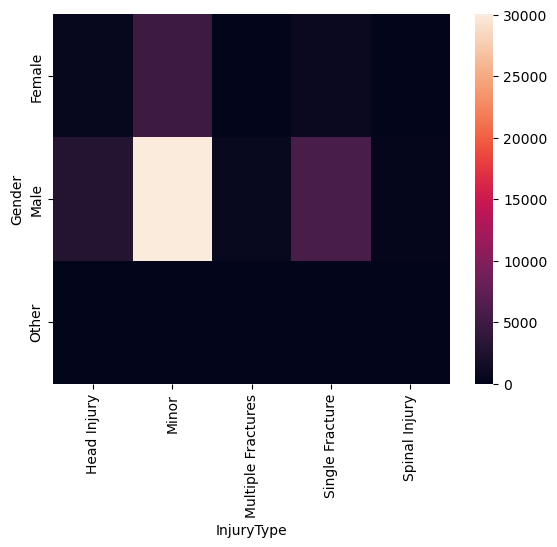

In [296]:
sns.heatmap(pd.crosstab(df["Gender"], df["InjuryType"]))

In [297]:
pd.crosstab(df["Age"], df["PatientStatus"])

PatientStatus  Alive & stable  Alive & unstable  Dead
Age                                                  
0.0                         1                 5     0
1.0                        16                31     2
2.0                        31                36     2
3.0                        46                54     2
4.0                        45                52     4
...                       ...               ...   ...
98.0                        0                 1     0
100.0                       0                 2     0
101.0                       1                 0     0
108.0                       0                 1     0
118.0                       1                 0     0

[101 rows x 3 columns]

- Percentage

In [299]:
crosstab = pd.crosstab(df["Age"], df["PatientStatus"], normalize='index')


crosstab_percentage = crosstab * 100


print(crosstab_percentage)

PatientStatus  Alive & stable  Alive & unstable      Dead
Age                                                      
0.0                 16.666667         83.333333  0.000000
1.0                 32.653061         63.265306  4.081633
2.0                 44.927536         52.173913  2.898551
3.0                 45.098039         52.941176  1.960784
4.0                 44.554455         51.485149  3.960396
...                       ...               ...       ...
98.0                 0.000000        100.000000  0.000000
100.0                0.000000        100.000000  0.000000
101.0              100.000000          0.000000  0.000000
108.0                0.000000        100.000000  0.000000
118.0              100.000000          0.000000  0.000000

[101 rows x 3 columns]


<Axes: xlabel='PatientStatus', ylabel='Age'>

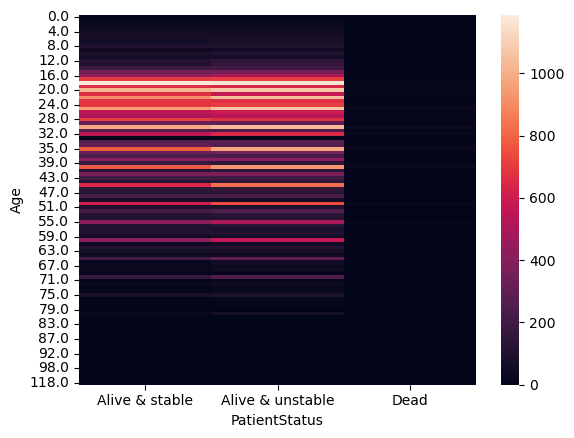

In [300]:
sns.heatmap(pd.crosstab(df["Age"], df["PatientStatus"]))

In [301]:
pd.crosstab(df["EcYear"], df["PatientStatus"])

PatientStatus  Alive & stable  Alive & unstable  Dead
EcYear                                               
2020.0                   5247              5985   150
2021.0                   5896              6605   176
2022.0                   6156              6582   165
2023.0                   4513              4618    96

- Percentage

In [303]:
crosstab = pd.crosstab(df["EcYear"], df["PatientStatus"], normalize='index')


crosstab_percentage = crosstab * 100


print(crosstab_percentage)

PatientStatus  Alive & stable  Alive & unstable      Dead
EcYear                                                   
2020.0              46.099104         52.583026  1.317870
2021.0              46.509427         52.102232  1.388341
2022.0              47.709835         51.011393  1.278772
2023.0              48.910805         50.048770  1.040425


<Axes: xlabel='PatientStatus', ylabel='EcYear'>

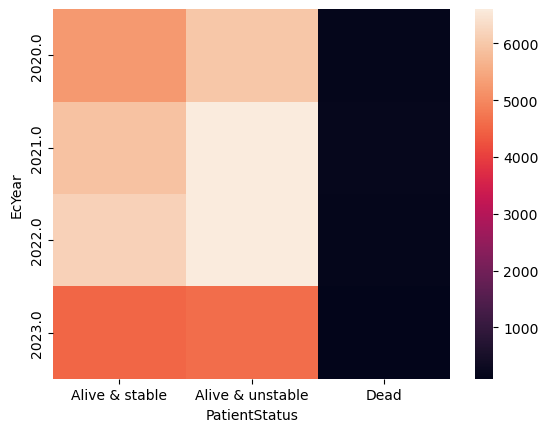

In [304]:
sns.heatmap(pd.crosstab(df["EcYear"], df["PatientStatus"]))

In [305]:
pd.crosstab(df["EcYear"], df["InjuryType"])

InjuryType  Head Injury  Minor  Multiple Fractures  Single Fracture  \
EcYear                                                                
2020.0              896   8474                 221             1670   
2021.0              993   9382                 258             1927   
2022.0              983   9804                 206             1826   
2023.0              631   7130                  93             1314   

InjuryType  Spinal Injury  
EcYear                     
2020.0                121  
2021.0                117  
2022.0                 84  
2023.0                 59

- Percentage

In [307]:
crosstab = pd.crosstab(df["EcYear"], df["InjuryType"], normalize='index')


crosstab_percentage = crosstab * 100


print(crosstab_percentage)

InjuryType  Head Injury      Minor  Multiple Fractures  Single Fracture  \
EcYear                                                                    
2020.0         7.872079  74.450887            1.941662        14.672290   
2021.0         7.833084  74.008046            2.035182        15.200757   
2022.0         7.618383  75.982330            1.596528        14.151748   
2023.0         6.838626  77.273220            1.007912        14.240815   

InjuryType  Spinal Injury  
EcYear                     
2020.0           1.063082  
2021.0           0.922931  
2022.0           0.651011  
2023.0           0.639428  


<Axes: xlabel='InjuryType', ylabel='EcYear'>

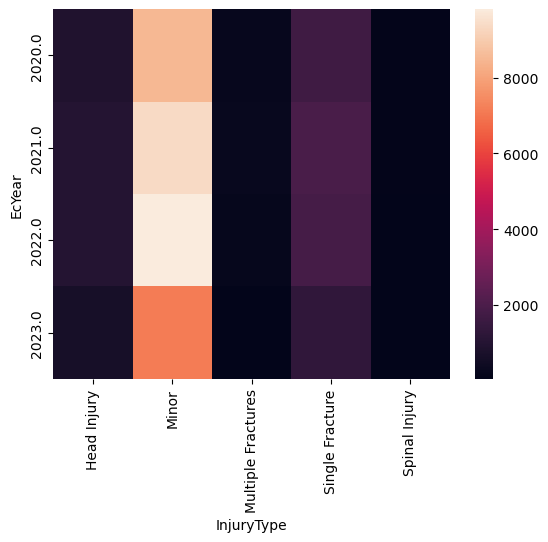

In [308]:
sns.heatmap(pd.crosstab(df["EcYear"], df["InjuryType"]))

In [309]:
pd.crosstab(df["BikesInvolved"], df["InjuryType"])

InjuryType     Head Injury  Minor  Multiple Fractures  Single Fracture  \
BikesInvolved                                                            
0.0                    893   5896                 204             1314   
1.0                   2088  23618                 496             4442   
2.0                    521   5266                  78              978   
3.0                      1      8                   0                3   
10.0                     0      2                   0                0   

InjuryType     Spinal Injury  
BikesInvolved                 
0.0                      126  
1.0                      220  
2.0                       35  
3.0                        0  
10.0                       0

In [310]:
pd.crosstab(df["BikesInvolved"], df["PatientStatus"])

PatientStatus  Alive & stable  Alive & unstable  Dead
BikesInvolved                                        
0.0                      3090              5065   278
1.0                     15343             15230   291
2.0                      3376              3484    18
3.0                         1                11     0
10.0                        2                 0     0

In [311]:
crosstab = pd.crosstab(df["BikesInvolved"], df["PatientStatus"], normalize='index')


crosstab_percentage = crosstab * 100


print(crosstab_percentage)

PatientStatus  Alive & stable  Alive & unstable      Dead
BikesInvolved                                            
0.0                 36.641764         60.061663  3.296573
1.0                 49.711638         49.345516  0.942846
2.0                 49.084036         50.654260  0.261704
3.0                  8.333333         91.666667  0.000000
10.0               100.000000          0.000000  0.000000


<Axes: xlabel='PatientStatus', ylabel='BikesInvolved'>

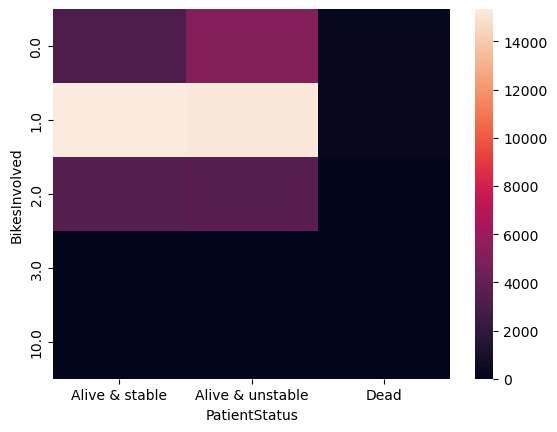

In [312]:
sns.heatmap(pd.crosstab(df["BikesInvolved"], df["PatientStatus"]))

In [313]:
pd.crosstab(df["CarsInvolved"], df["InjuryType"])

InjuryType    Head Injury  Minor  Multiple Fractures  Single Fracture  \
CarsInvolved                                                            
0.0                  2744  27132                 609             5072   
1.0                   727   7331                 164             1620   
2.0                    31    314                   4               39   
3.0                     0      8                   1                6   
4.0                     0      1                   0                0   
5.0                     1      4                   0                0   

InjuryType    Spinal Injury  
CarsInvolved                 
0.0                     270  
1.0                     104  
2.0                       7  
3.0                       0  
4.0                       0  
5.0                       0

In [314]:
crosstab = pd.crosstab(df["CarsInvolved"], df["PatientStatus"], normalize='index')


crosstab_percentage = crosstab * 100


print(crosstab_percentage)

PatientStatus  Alive & stable  Alive & unstable       Dead
CarsInvolved                                              
0.0                 47.310687         51.391409   1.297904
1.0                 47.124472         51.709230   1.166298
2.0                 43.797468         54.936709   1.265823
3.0                  6.666667         93.333333   0.000000
4.0                100.000000          0.000000   0.000000
5.0                  0.000000         80.000000  20.000000


In [315]:
df.isnull().sum().sum()

0

# Phase 2 Implementation

# Target Variable

Our Target Variables are:
- InjuryType
- PatientStatus

# Logistic Regression

- PatientStatus as Target

- feature column

In [322]:
feature_columns = [
    'Age', 'Gender', 'Reason',
    'responsetime', 'Cause', 'BicycleInvovled',
    'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
    'TrainsInvovled', 'TrucksInvolved', 'VansInvolved',
    'OthersInvolved'
]

In [323]:
X = df[feature_columns].copy()

- Converting categorical to numerical

In [325]:
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [326]:
patient_status_categories = df['PatientStatus'].unique()
print("\nUnique Patient Status categories:", patient_status_categories)


Unique Patient Status categories: ['Alive & unstable' 'Alive & stable' 'Dead']


- Creating target variable y

In [328]:
y = df['PatientStatus']
le_status = LabelEncoder()
y = le_status.fit_transform(y)

- Scaling

In [330]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Into Train and Test Sets

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- Defining solvers and iteration values to experiment with

In [334]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [100, 200, 300, 400, 500]

In [335]:
results = []

# Training and Evaluating Models

In [337]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, confusion_matrix


# init results list
results = []

unique_classes = np.unique(y)

for solver in solvers:
    for max_iter in max_iters:
        try:
            model = LogisticRegression(solver=solver, max_iter=max_iter, random_state=42)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            try:
                y_train_proba = model.predict_proba(X_train)
                y_test_proba = model.predict_proba(X_test)
                train_loss = log_loss(y_train, y_train_proba)
                val_loss = log_loss(y_test, y_test_proba)
            except AttributeError:
                train_loss, val_loss = None, None

            conf_matrix = confusion_matrix(y_test, y_pred)

            results.append({
                'solver': solver,
                'max_iter': max_iter,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'confusion_matrix': conf_matrix
            })

        except Exception as e:
            print(f"Error with solver={solver}, max_iter={max_iter}: {e}")

# results to DataFrame
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['accuracy'].idxmax()]

In [338]:
print("\nBest Model Results:")
print(f"Solver: {best_model['solver']}")
print(f"Max Iterations: {best_model['max_iter']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")
print(f"F1 Score: {best_model['f1']:.4f}")



Best Model Results:
Solver: liblinear
Max Iterations: 100
Accuracy: 0.6021
Precision: 0.6038
Recall: 0.6021
F1 Score: 0.6000


# Creating Visualizations

# Training and Validation Loss vs Max Iterations

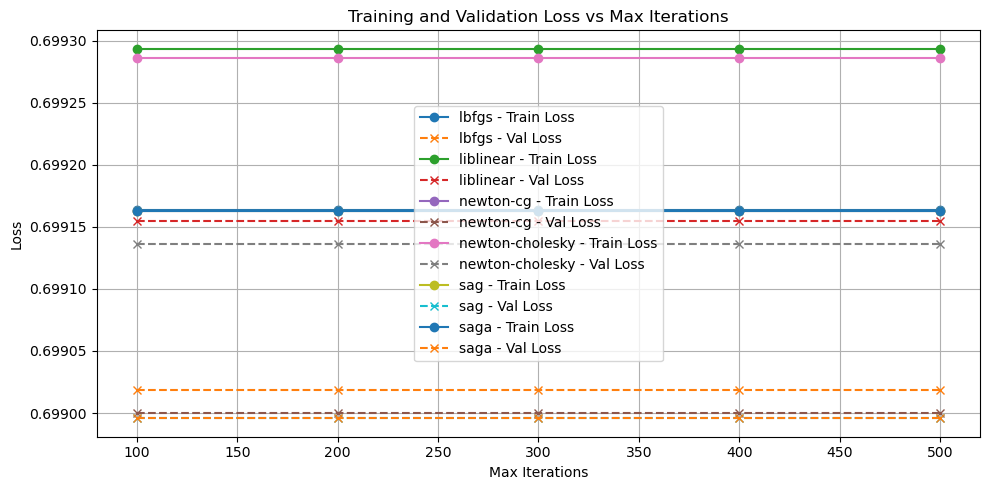

In [341]:
plt.figure(figsize=(10, 5))
for solver in solvers:
    solver_results = results_df[results_df['solver'] == solver]
    plt.plot(solver_results['max_iter'], solver_results['train_loss'], marker='o', label=f'{solver} - Train Loss')
    plt.plot(solver_results['max_iter'], solver_results['val_loss'], marker='x', linestyle='--', label=f'{solver} - Val Loss')
plt.xlabel('Max Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Max Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy Vs Solver

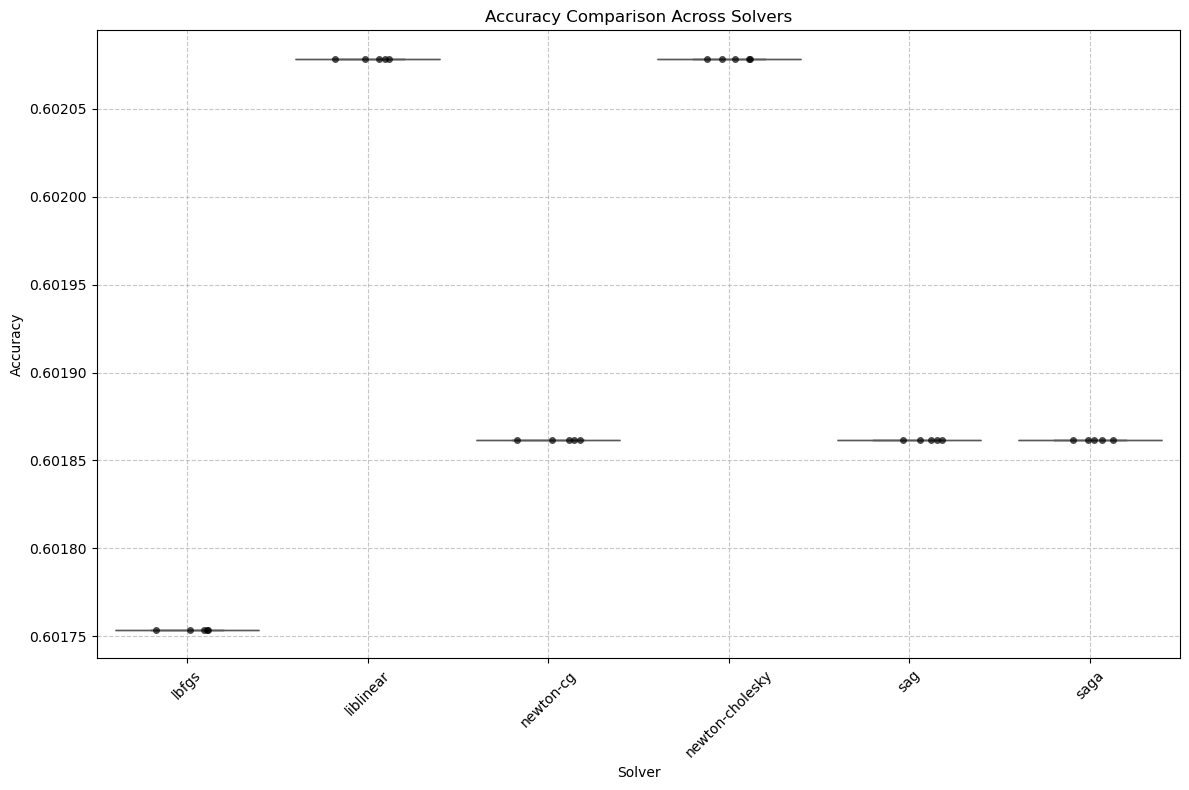

In [343]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='solver', y='accuracy', hue='solver', data=results_df, palette="Set2", dodge=False, legend=False)
sns.stripplot(x='solver', y='accuracy', data=results_df, color='black', jitter=0.2, alpha=0.7)
plt.title('Accuracy Comparison Across Solvers')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Accuracy vs Max iterations

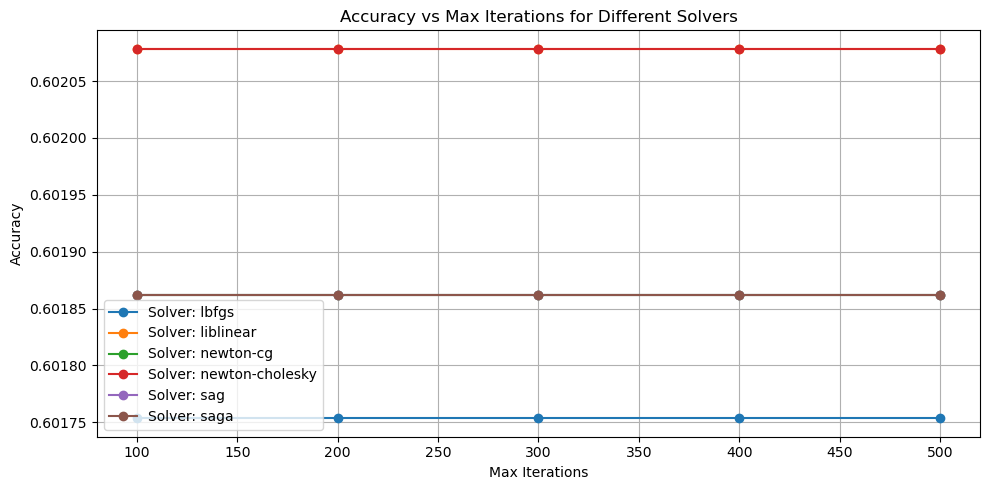

In [345]:
plt.figure(figsize=(10, 5))
for solver in solvers:
    solver_results = results_df[results_df['solver'] == solver]
    plt.plot(solver_results['max_iter'], solver_results['accuracy'], marker='o', label=f'Solver: {solver}')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Iterations for Different Solvers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion matrix

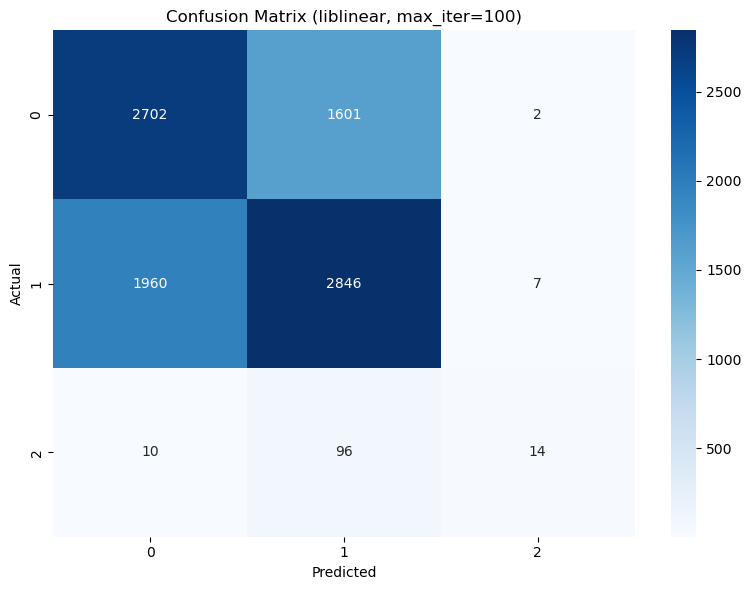

In [347]:
best_model = results_df.loc[results_df['accuracy'].idxmax()]
best_solver, best_max_iter = best_model['solver'], best_model['max_iter']
best_model_instance = LogisticRegression(solver=best_solver, max_iter=best_max_iter, random_state=42)
best_model_instance.fit(X_train, y_train)
y_pred_best = best_model_instance.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix ({best_solver}, max_iter={best_max_iter})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Scatter Plot of Accuracy and F1 Score vs Max Iterations for Different Solvers

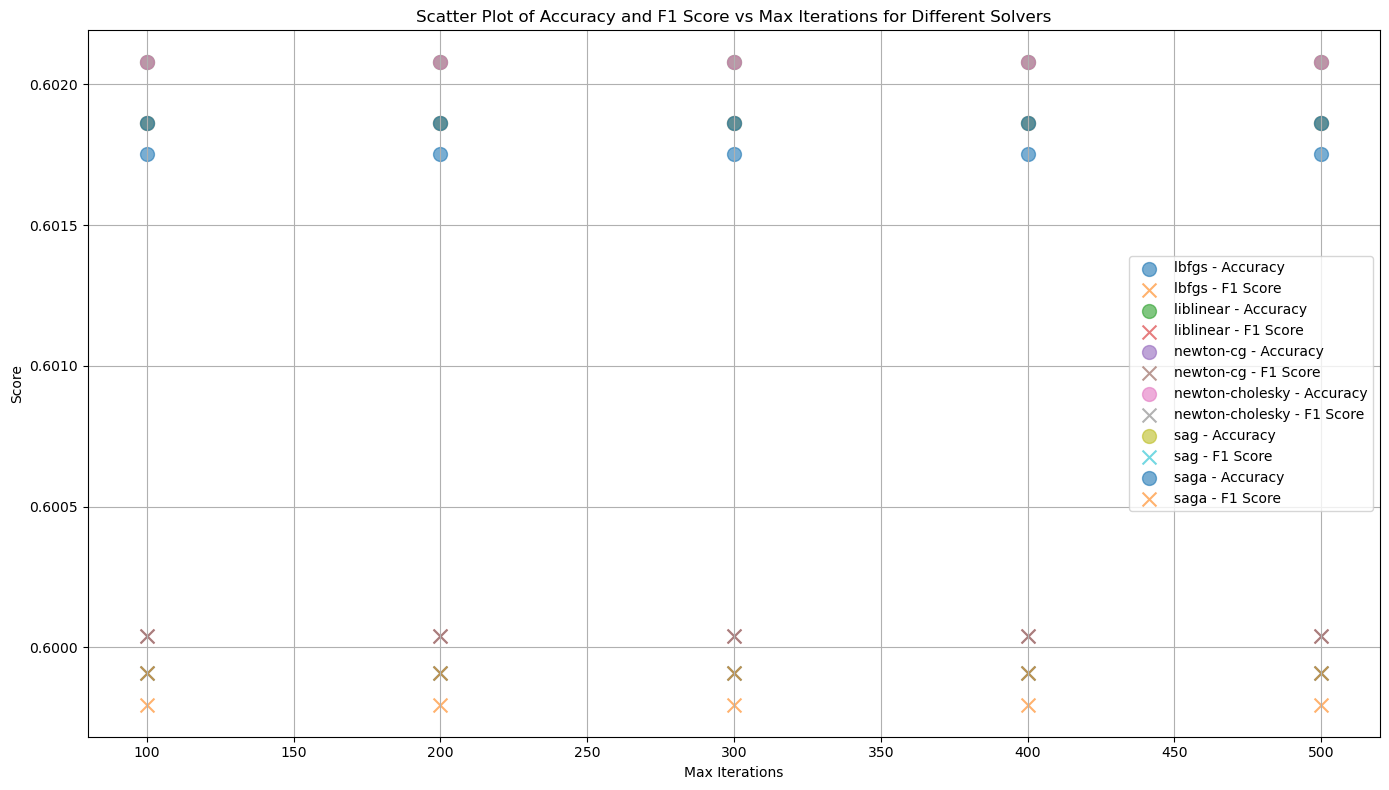

In [349]:
plt.figure(figsize=(14, 8))
for solver in solvers:
    solver_results = results_df[results_df['solver'] == solver]
    plt.scatter(solver_results['max_iter'], solver_results['accuracy'], label=f'{solver} - Accuracy', s=100, alpha=0.6)
    plt.scatter(solver_results['max_iter'], solver_results['f1'], label=f'{solver} - F1 Score', marker='x', s=100, alpha=0.6)

plt.xlabel('Max Iterations')
plt.ylabel('Score')
plt.title('Scatter Plot of Accuracy and F1 Score vs Max Iterations for Different Solvers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# F1 Scores Scatter Plot with Model Names

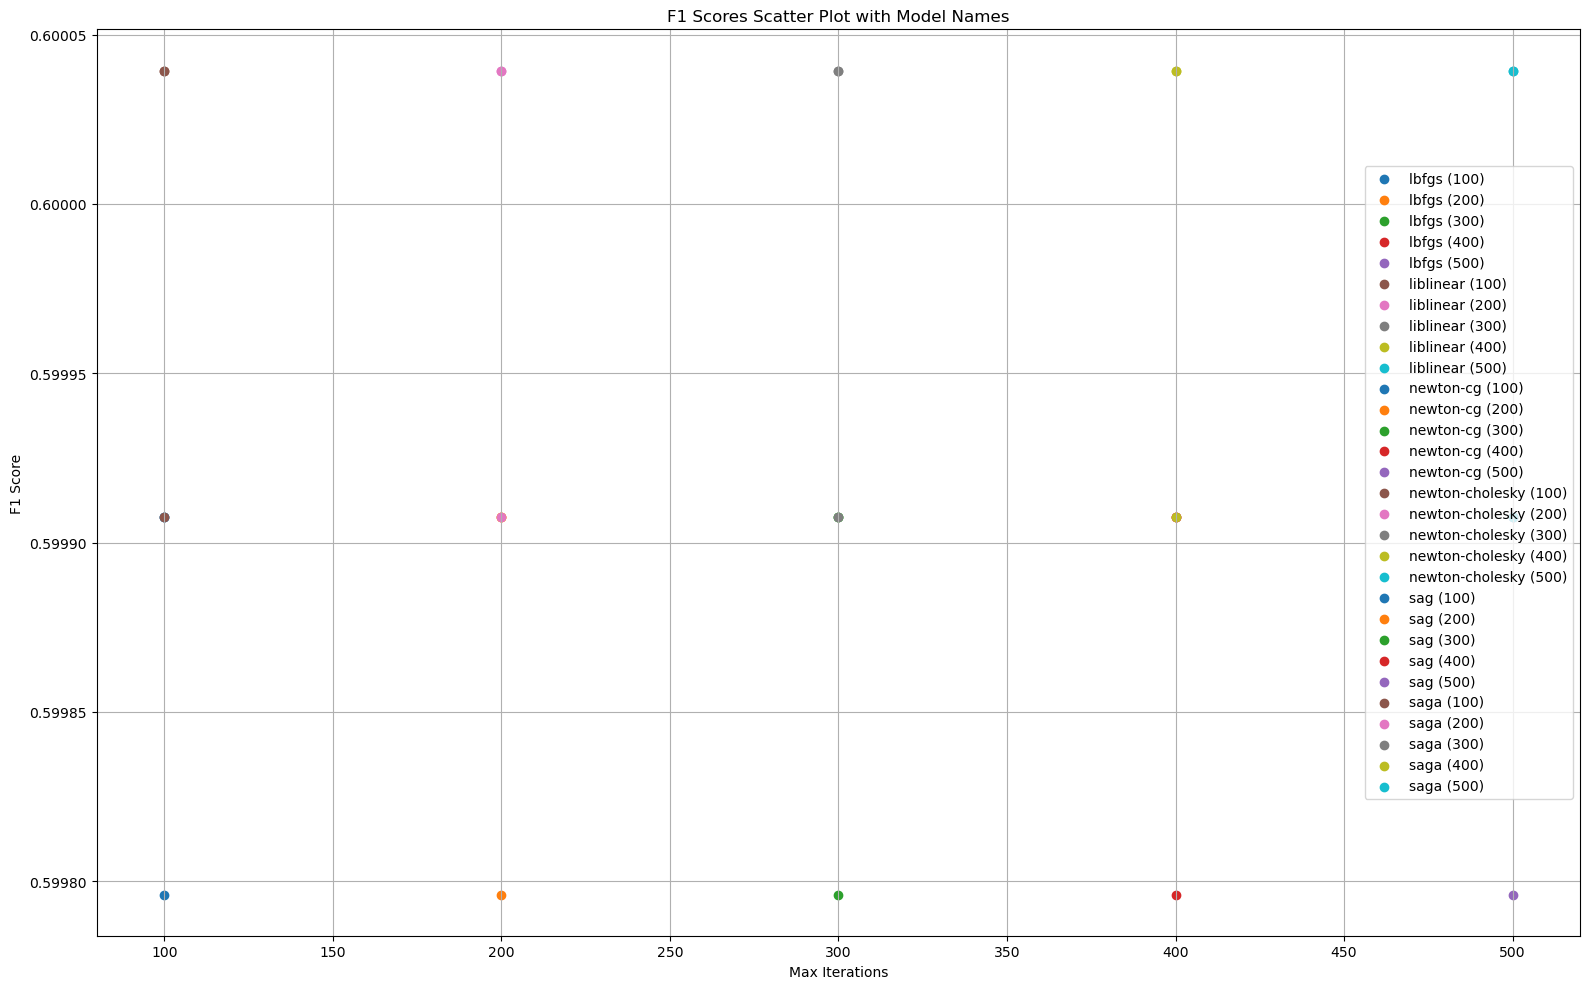

In [351]:
plt.figure(figsize=(16, 10))
for i, row in results_df.iterrows():
    plt.scatter(row['max_iter'], row['f1'], label=f"{row['solver']} ({row['max_iter']})")
plt.xlabel('Max Iterations')
plt.ylabel('F1 Score')
plt.title('F1 Scores Scatter Plot with Model Names')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Classification Report

In [353]:
best_model = results_df.loc[results_df['accuracy'].idxmax()].to_dict()

model = LogisticRegression(solver=best_model['solver'], max_iter=best_model['max_iter'], random_state=42)
model.fit(X_train, y_train)
best_predictions = model.predict(X_test)

best_model['predictions'] = best_predictions

In [354]:
from sklearn.metrics import classification_report

print("\nDetailed Classification Report:")
print(classification_report(y_test, best_predictions, target_names=le_status.classes_))



Detailed Classification Report:
                  precision    recall  f1-score   support

  Alive & stable       0.58      0.63      0.60      4305
Alive & unstable       0.63      0.59      0.61      4813
            Dead       0.61      0.12      0.20       120

        accuracy                           0.60      9238
       macro avg       0.60      0.45      0.47      9238
    weighted avg       0.60      0.60      0.60      9238

